### This script saves Bureau of Labor Statistics data into dataframe after an API call. It can read multiple series of data. Data is then available as a .csv file to import into Power BI and create different visuals.

In [1]:
import pandas as pd
import numpy as np
import requests
import json
from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [75]:
#Get the data from BLS web site using public API
headers = {'Content-type': 'application/json'}
series = ['CUUR0000SA0','SUUR0000SA0','PRS85006092', 'WPUFD49104']
start_year = '2013'
end_year = '2023'
data = json.dumps({"seriesid": series,"startyear":start_year, "endyear":end_year})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

In [76]:
#Save the data in csv files named after series
for series in json_data['Results']['series']:
    x=PrettyTable(["series id","year","period","value","footnotes"],border=False, header=True)
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    with open(seriesId + '.csv', 'w', newline='') as f_output:
        f_output.write(x.get_csv_string())

In [77]:
#Open one file
#col_names=["series id","year","period","value","footnotes"]
df=pd.read_csv('CIU1010000000000A.csv')
list(df.columns)

['series id', 'year', 'period', 'value', 'footnotes']

In [78]:
#Add date colum into data frame using period and year columns
#Monthly data
if df['period'].nunique() == 12:
    df['date'] = pd.to_datetime(df['period'].astype(str).str[-2:]+'-'+'1'+'-'+df['year'].astype(str))

#Quarterly data
if df['period'].nunique() == 4:
    # for quarters do this period[:1]+str(int(period[-2:])*3)
    df['period'] = df['period'].str.replace('0', '')
    df['date'] = pd.PeriodIndex(df['year'].astype(str)+'-'+df['period'].astype(str), freq='Q').to_timestamp()

In [79]:
df.head()

,series id,year,period,value,footnotes,date
0,CIU1010000000000A,2022,Q4,5.1,NaN,2022-10-01
1,CIU1010000000000A,2022,Q3,5.0,NaN,2022-07-01
2,CIU1010000000000A,2022,Q2,5.1,NaN,2022-04-01
3,CIU1010000000000A,2022,Q1,4.5,NaN,2022-01-01
4,CIU1010000000000A,2021,Q4,4.0,NaN,2021-10-01


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   series id  40 non-null     object        
 1   year       40 non-null     int64         
 2   period     40 non-null     object        
 3   value      40 non-null     float64       
 4   footnotes  0 non-null      float64       
 5   date       40 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 2.0+ KB


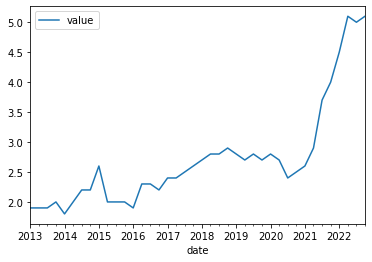

In [81]:
#Plot the data to find all is ok. If it looks good put in your dashboard!
df.plot(x='date',y='value')
plt.show()